# CPMG 신호 생성 & 1D->2D 변환

#### 파라미터 값
- MAGNETIC_FIELD = 403.553                                  # Unit: Gauss
- GYRO_MAGNETIC_RATIO = 1.0705*1000                         # Unit: Herts
- WL_VALUE = MAGNETIC_FIELD*GYRO_MAGNETIC_RATIO*2*np.pi
- time_data = np.arange(0, 60, 0.004)                       # time_data: a time range of simularated CPMG data. (unit: us, resolution: 4ns)

#### spin 리스트
- Spin1 = [5, 32]
- Spin2 = [48, 53]
- Spin3 = [10, 10]
- Spin4 = [-18, 18]
- Spin5 = [-23, 15]
- Spin6 = [-35, 28]

## N32

In [1]:
import numpy as np
import glob
import sys
from imports.utils import *
init_notebook_mode(connected=True)
import time
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt

In [23]:
N_PULSE_32 = 32
N_PULSE_64 = 64
N_PULSE_96 = 96
N_PULSE_256 = 256
MAGNETIC_FIELD = 403.553            # Unit: Gauss
GYRO_MAGNETIC_RATIO = 1.07*1000               # Unit: Herts
WL_VALUE = MAGNETIC_FIELD*GYRO_MAGNETIC_RATIO*2*np.pi

# time_data: a time range of simularated CPMG data. (unit: us, resolution: 4ns)
time_data = np.arange(0, 60, 0.004)

In [24]:
# total_indices: a dictionary file that contains target periods (value: time indexing number) with a corresponding target period (key: A (Hz)).
total_indices = np.load('../data/total_indices/total_indices_v4_full.npy', allow_pickle=True).item()

# AB_lists_dic: a dictionary file that contains nuclear spins (value: (A,B) pairs (Hz)) with a corresponding target period (key: A (Hz)).
AB_lists_dic = np.load('../data/AB_target_dic/AB_target_dic_v4_s0.npy', allow_pickle=True).item()
for i in range(1, 16):
    temp = np.load('../data/AB_target_dic/AB_target_dic_v4_s{}.npy'.format(i), allow_pickle=True).item()
    AB_lists_dic.update(temp)

In [25]:
total_spins = np.array([
                        [5, 32],
                        [41, 53],
                        [10, 11],
                        [-17, 18],
                        [-23, 15],
                        [-35, 28],
])

In [26]:
M_values = M_list_return(time_data*1e-6, WL_VALUE, total_spins*2000*np.pi, N_PULSE_32)
Px = (1+M_values) / 2

In [27]:
# CPMG 신호 저장
# np.save('../data/cpmg/cpmg_data_N32_deno.npy', Px)

Text(0, 0.5, 'Px')

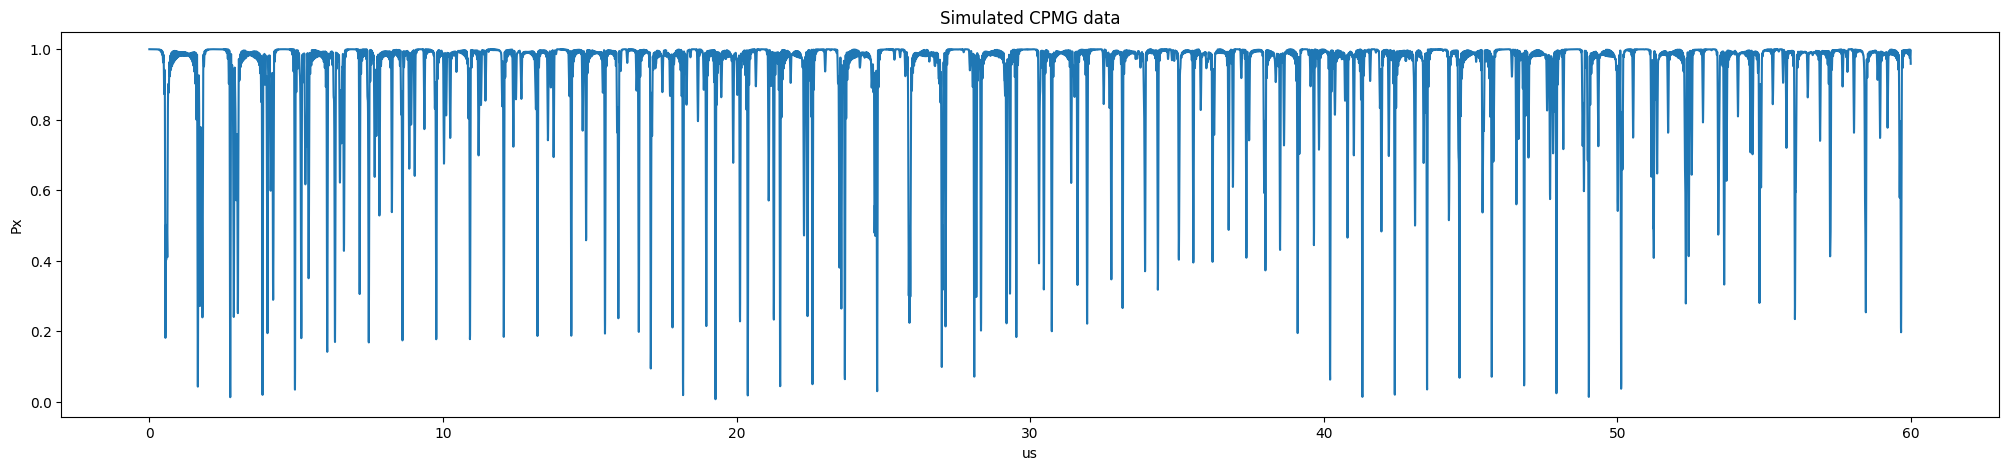

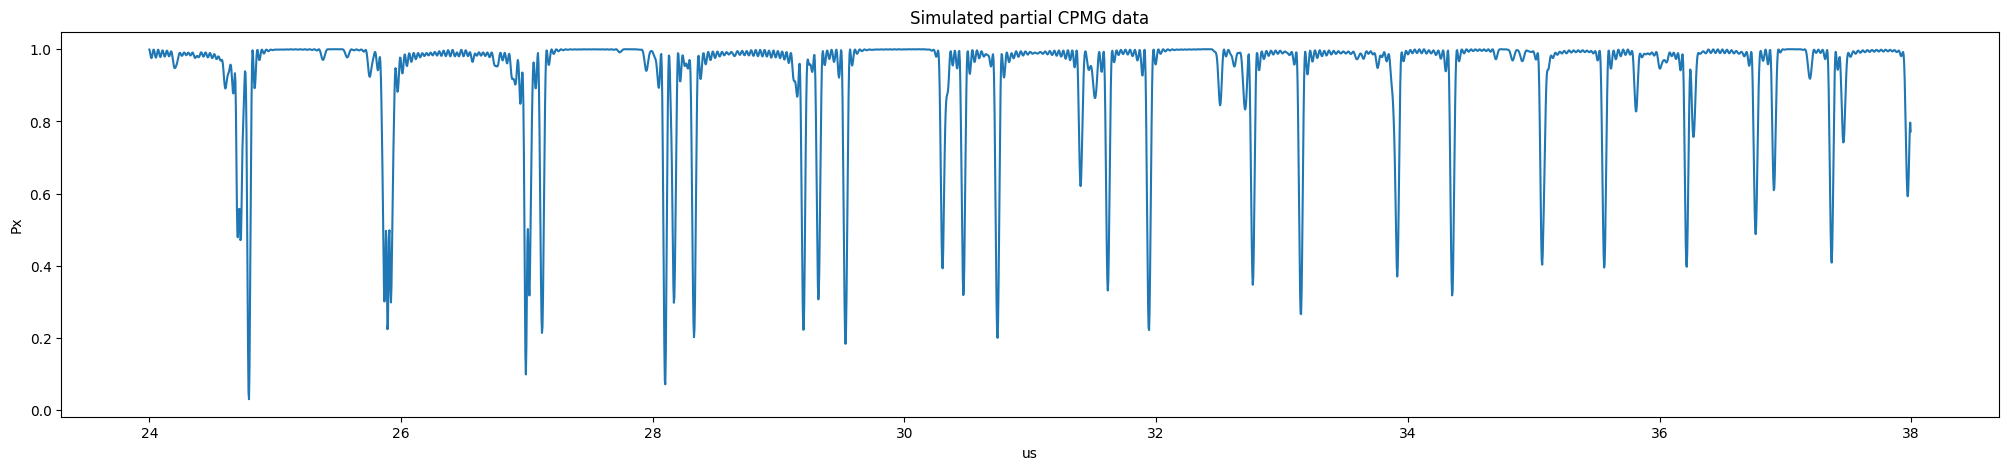

In [28]:
plt.figure(facecolor='w', figsize=(25, 5))
plt.plot(time_data, Px)
plt.title('Simulated CPMG data')
plt.xlabel('us')
plt.ylabel('Px')

plt.figure(facecolor='w', figsize=(25, 5))
plt.title('Simulated partial CPMG data')
plt.plot(time_data[6000:9500], Px[6000:9500])
plt.xlabel('us')
plt.ylabel('Px')

In [29]:
# CPMG 데이터 전처리

# A_index: a parameter to determine a target period (TPk) in the main text. For example, if you set A_index = 0, then you see the data with a target period of the Larmor frequency.
A_index = 0
# image width: a parameter to determine a width of an image.
image_width = 120
# model_index: a parameter to slice the CPMG data with a target period.
model_index = get_model_index(total_indices, A_index, time_thres_idx=time_data.shape[0], image_width=image_width)

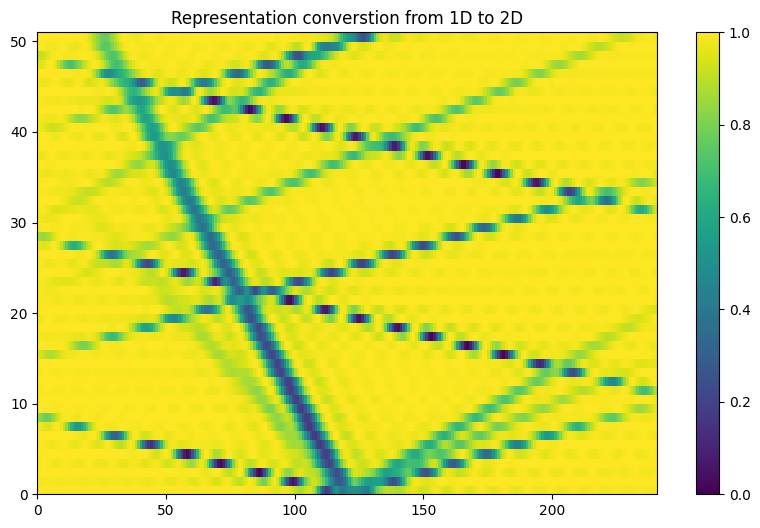

In [30]:
plt.figure(facecolor='w', figsize=(10,6))
plt.pcolor(Px[model_index], vmin=0, vmax=1)
plt.title('Representation converstion from 1D to 2D')
plt.colorbar()

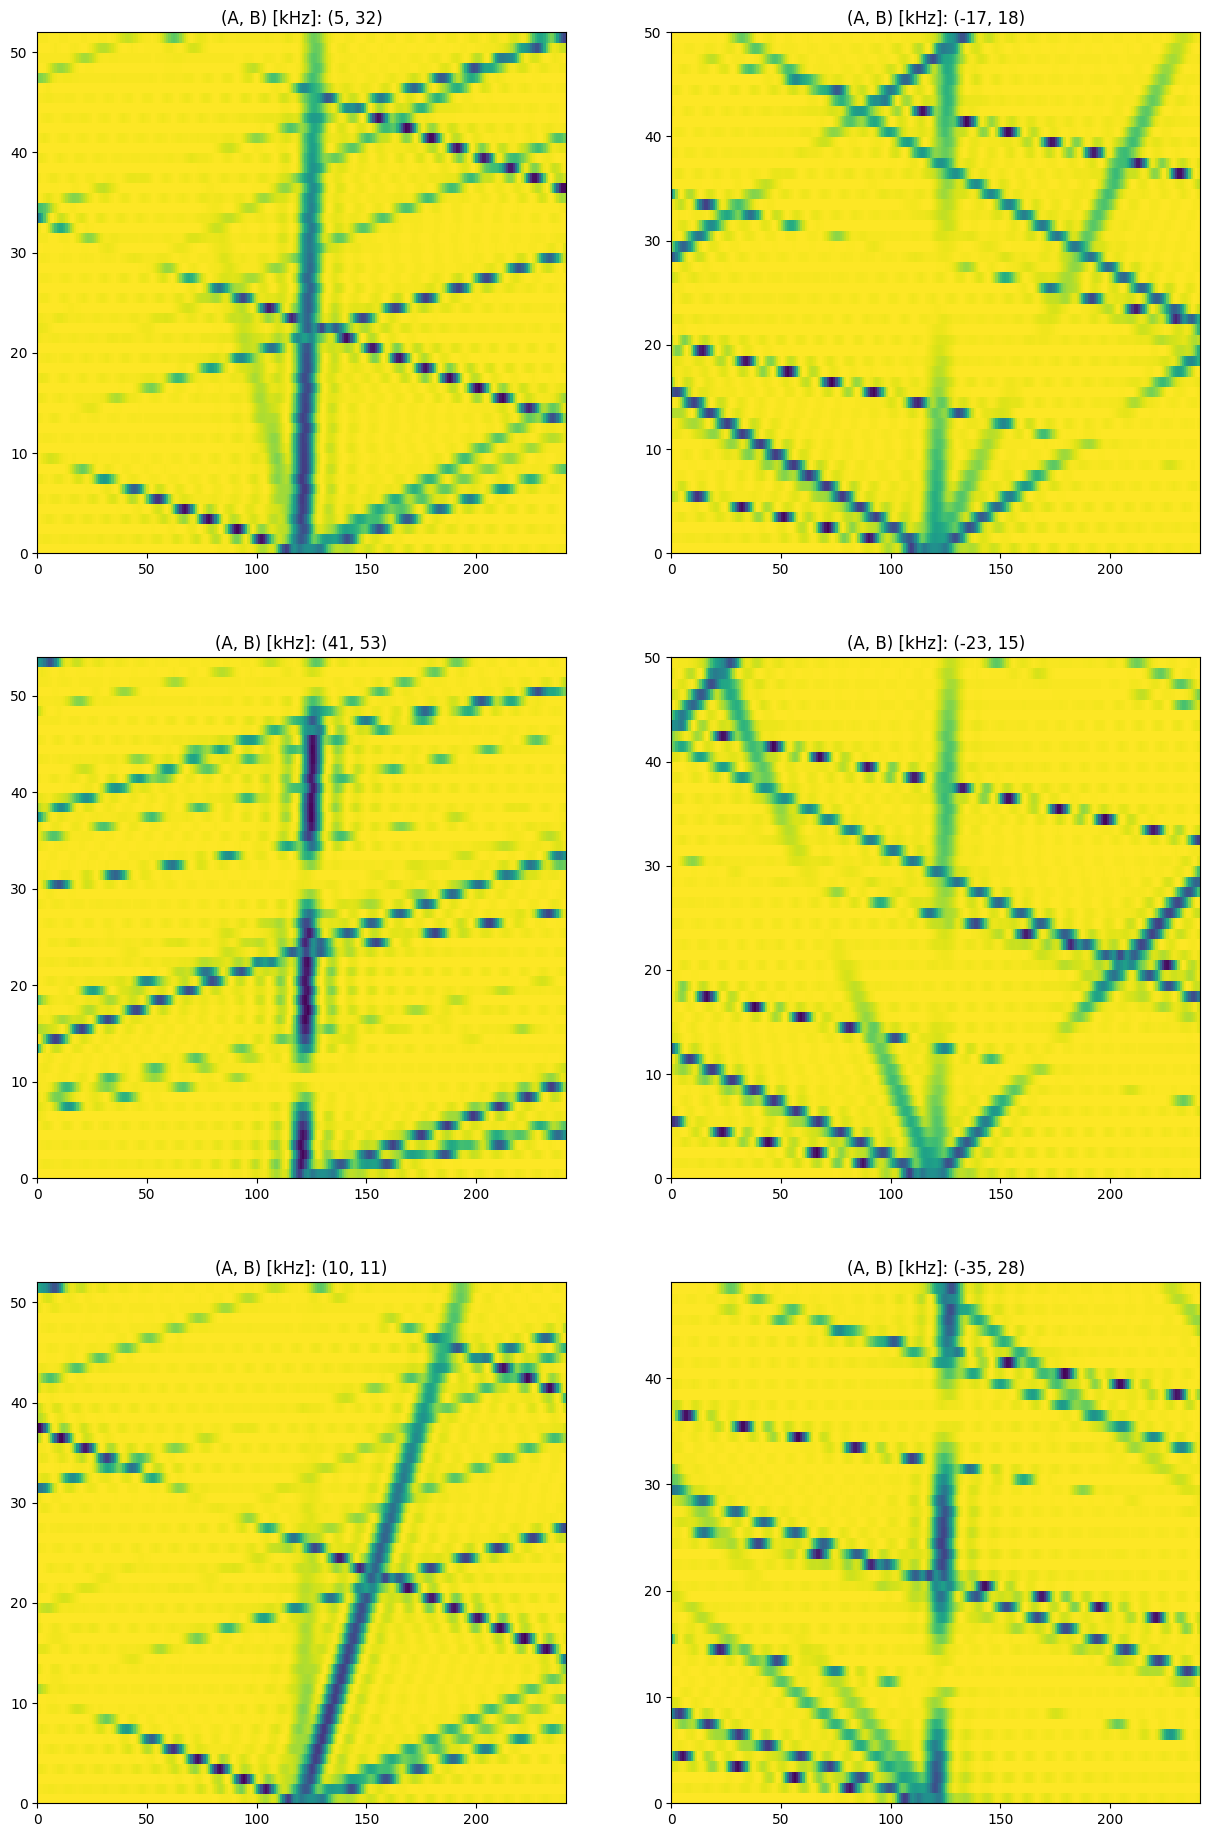

In [31]:
fig, axes = plt.subplots(facecolor='w', figsize=(15, 23), nrows=3, ncols=2)
for idx, spin in enumerate(total_spins):
  A_index = return_TPk_from_AB(spin[0]*1000, spin[1]*1000, WL_VALUE, 1)
  model_index = get_model_index(total_indices, A_index, time_thres_idx=time_data.shape[0], image_width=image_width)
  axes[idx%3, idx//3].pcolor(Px[model_index], vmin=0, vmax=1)
  axes[idx%3, idx//3].set_title('(A, B) [kHz]: '+'('+str(spin[0])+', ' + str(spin[1])+')')

## N64

In [32]:
M_values = M_list_return(time_data*1e-6, WL_VALUE, total_spins*2000*np.pi, N_PULSE_64)
Px = (1+M_values) / 2

In [33]:
# CPMG 신호 저장
# np.save('../data/cpmg/cpmg_data_N64_deno.npy', Px)

Text(0, 0.5, 'Px')

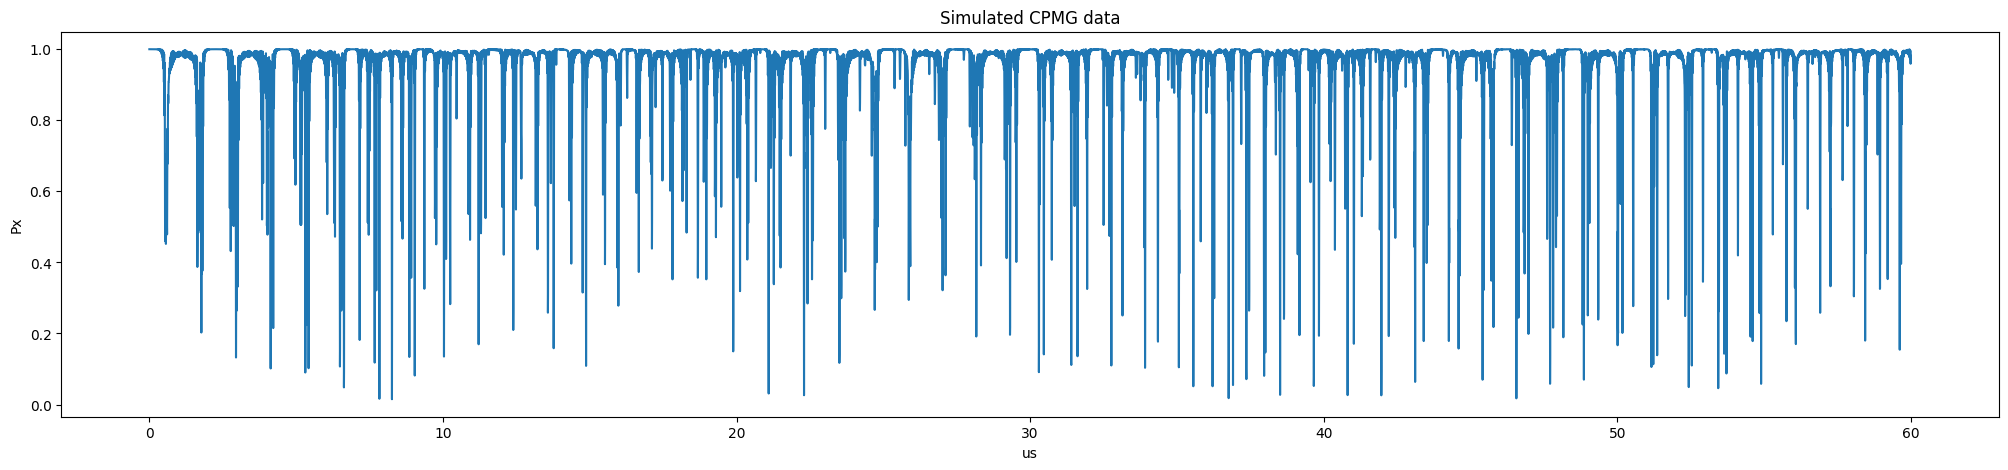

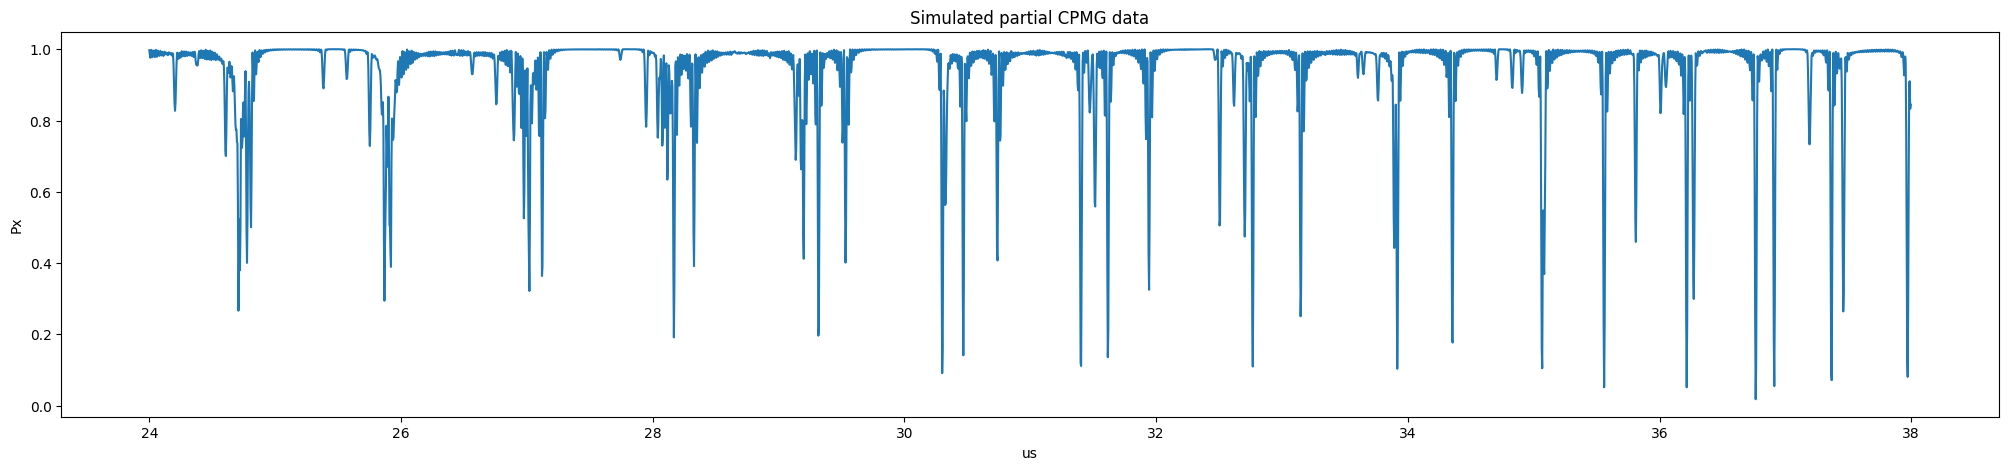

In [34]:
plt.figure(facecolor='w', figsize=(25, 5))
plt.plot(time_data, Px)
plt.title('Simulated CPMG data')
plt.xlabel('us')
plt.ylabel('Px')

plt.figure(facecolor='w', figsize=(25, 5))
plt.title('Simulated partial CPMG data')
plt.plot(time_data[6000:9500], Px[6000:9500])
plt.xlabel('us')
plt.ylabel('Px')

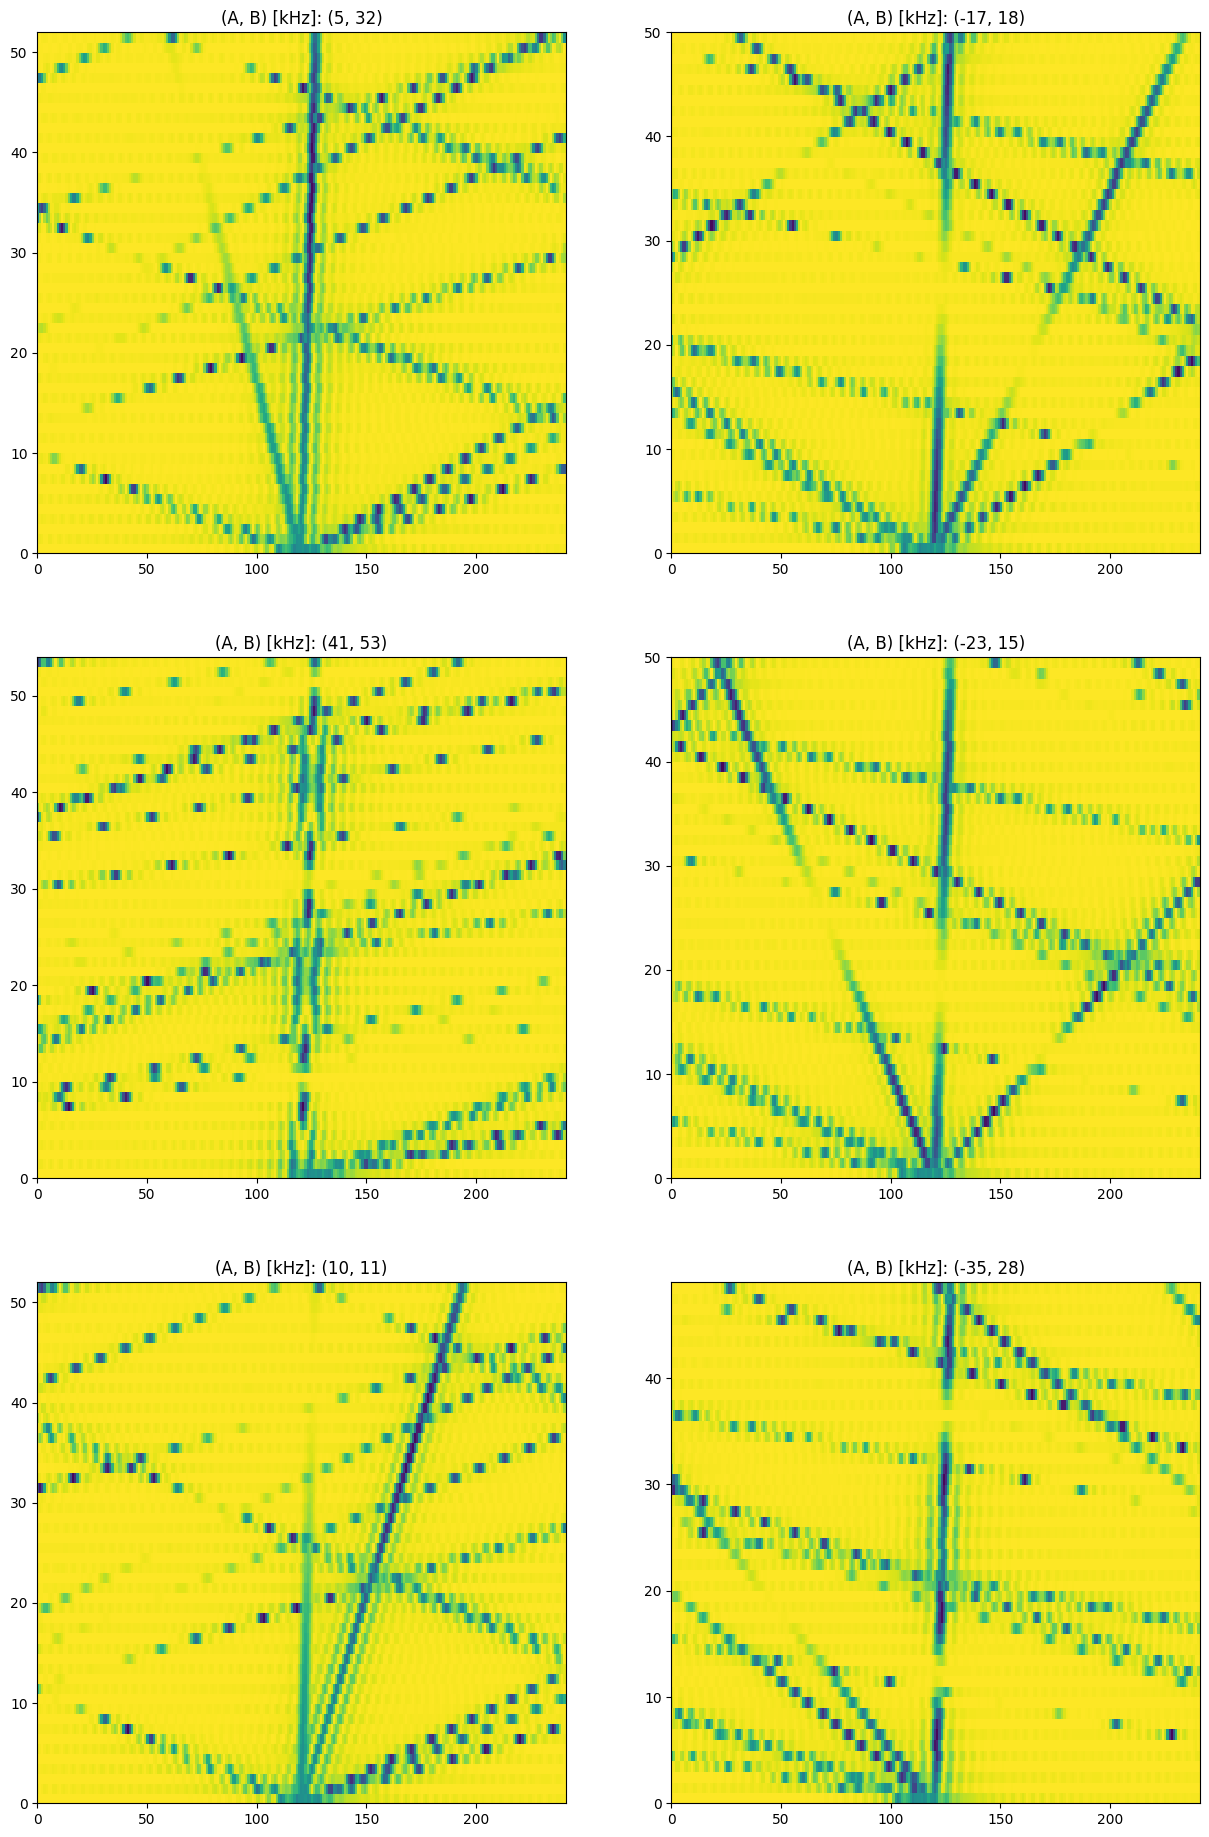

In [35]:
fig, axes = plt.subplots(facecolor='w', figsize=(15, 23), nrows=3, ncols=2)
for idx, spin in enumerate(total_spins):
  A_index = return_TPk_from_AB(spin[0]*1000, spin[1]*1000, WL_VALUE, 1)
  model_index = get_model_index(total_indices, A_index, time_thres_idx=time_data.shape[0], image_width=image_width)
  axes[idx%3, idx//3].pcolor(Px[model_index], vmin=0, vmax=1)
  axes[idx%3, idx//3].set_title('(A, B) [kHz]: '+'('+str(spin[0])+', ' + str(spin[1])+')')

## N96

In [36]:
M_values = M_list_return(time_data*1e-6, WL_VALUE, total_spins*2000*np.pi, N_PULSE_96)
Px = (1+M_values) / 2

In [37]:
# CPMG 신호 저장
# np.save('../data/cpmg/cpmg_data_N96_deno.npy', Px)

Text(0, 0.5, 'Px')

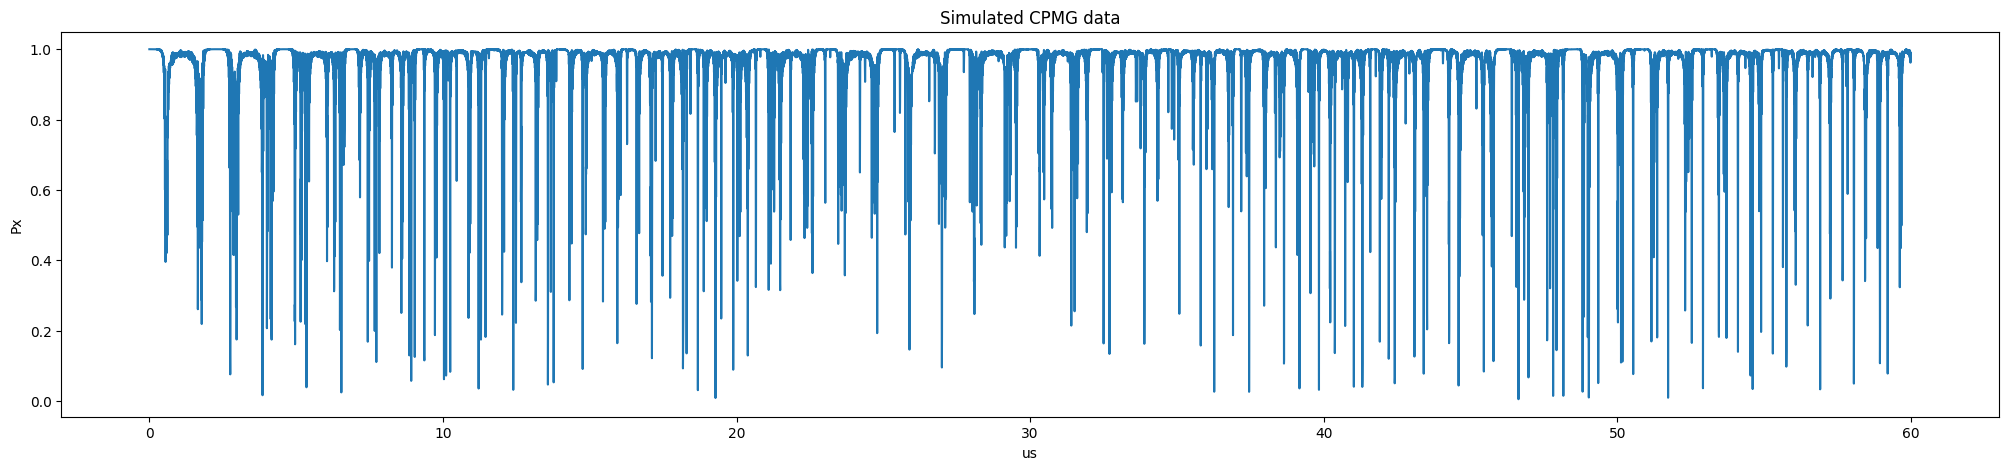

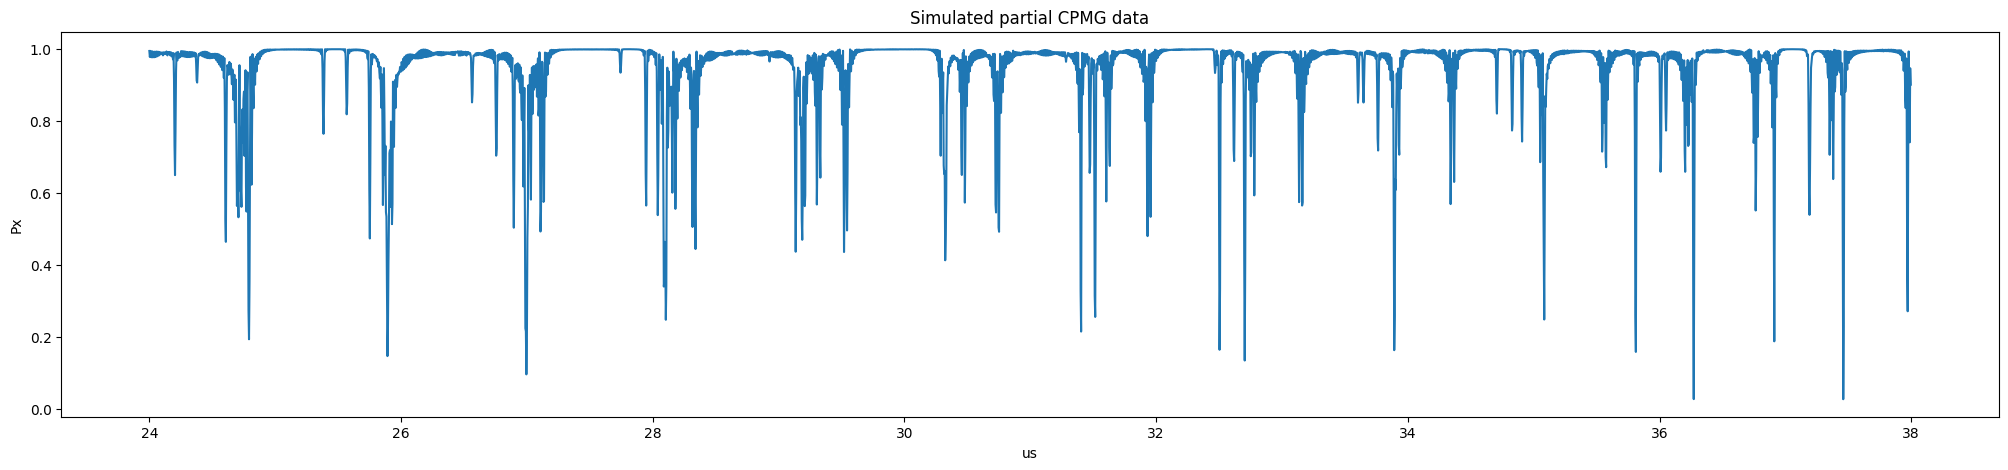

In [38]:
plt.figure(facecolor='w', figsize=(25, 5))
plt.plot(time_data, Px)
plt.title('Simulated CPMG data')
plt.xlabel('us')
plt.ylabel('Px')

plt.figure(facecolor='w', figsize=(25, 5))
plt.title('Simulated partial CPMG data')
plt.plot(time_data[6000:9500], Px[6000:9500])
plt.xlabel('us')
plt.ylabel('Px')

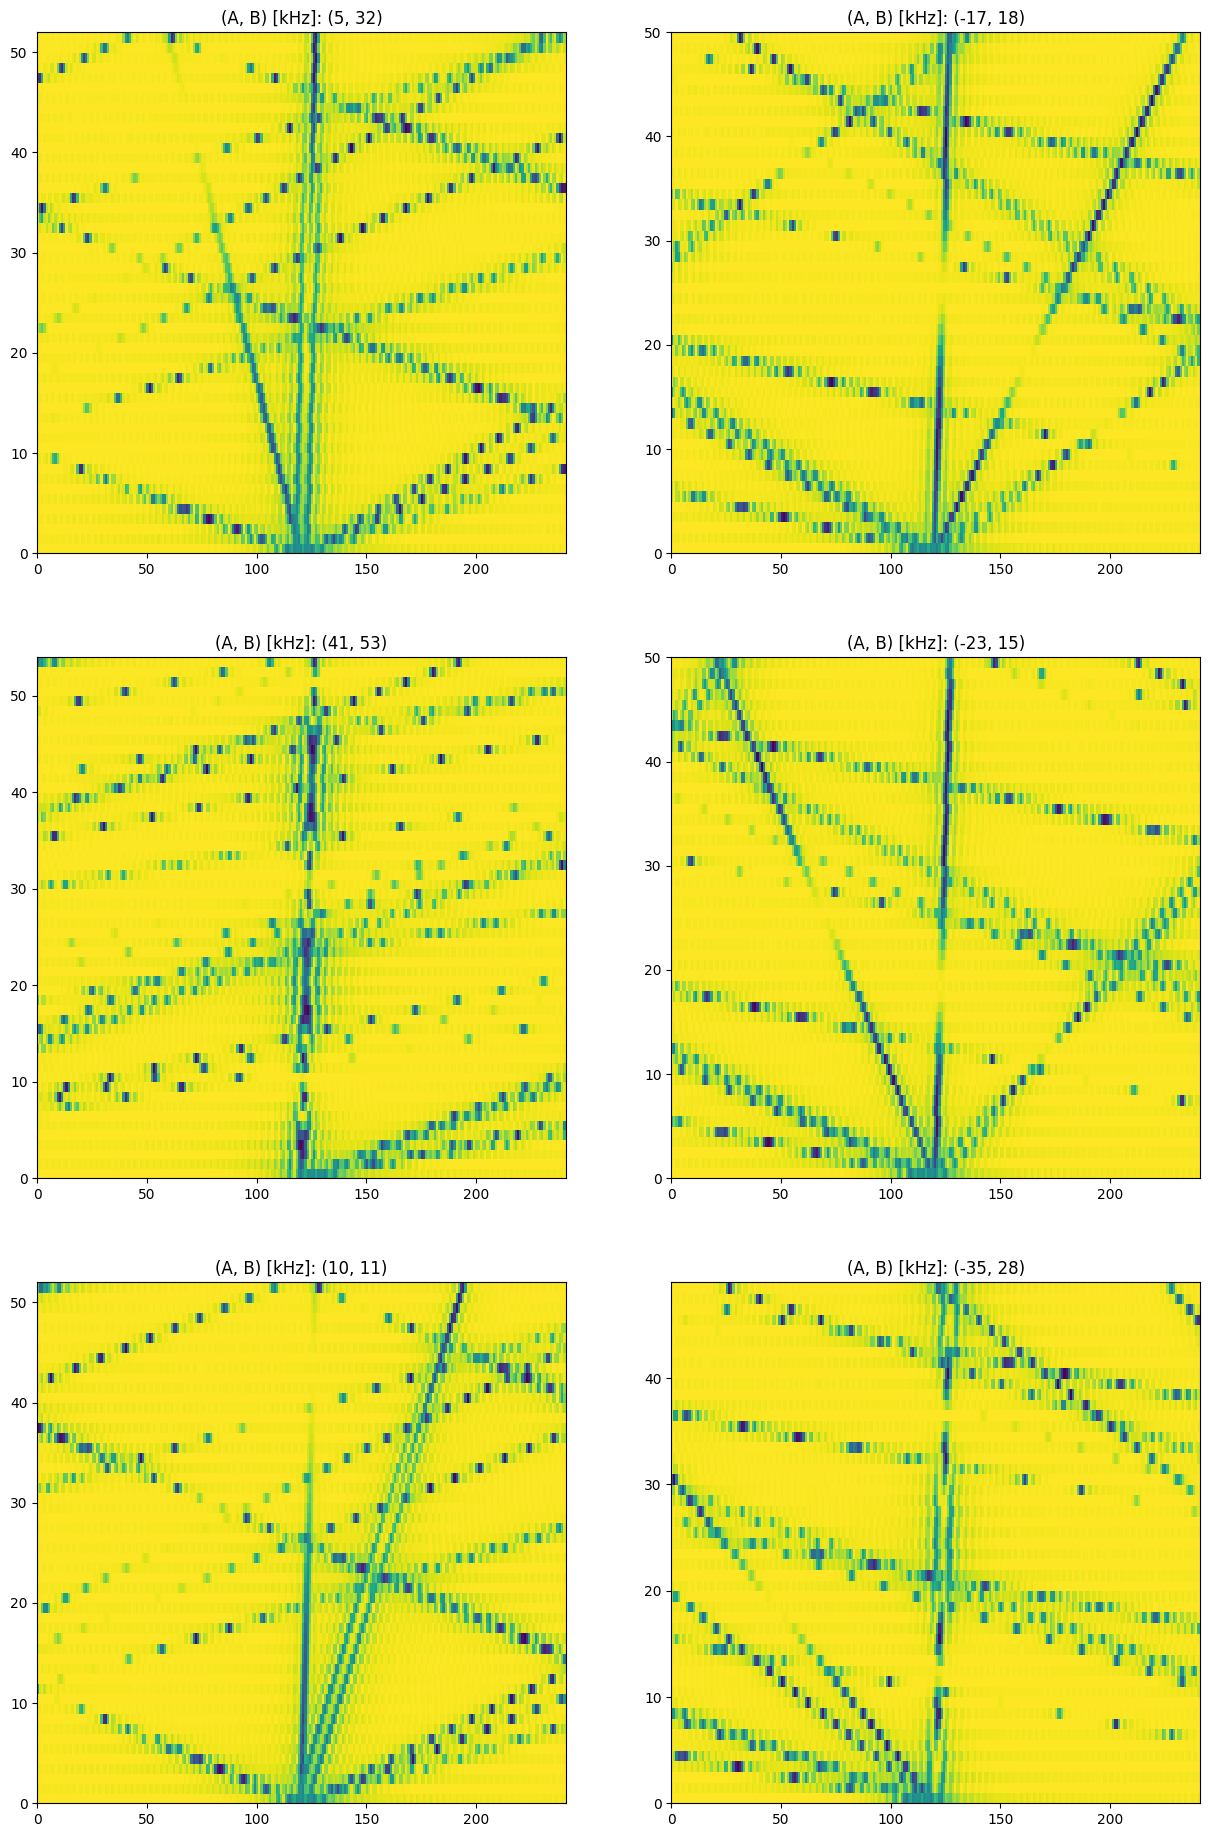

In [39]:
fig, axes = plt.subplots(facecolor='w', figsize=(15, 23), nrows=3, ncols=2)
for idx, spin in enumerate(total_spins):
  A_index = return_TPk_from_AB(spin[0]*1000, spin[1]*1000, WL_VALUE, 1)
  model_index = get_model_index(total_indices, A_index, time_thres_idx=time_data.shape[0], image_width=image_width)
  axes[idx%3, idx//3].pcolor(Px[model_index], vmin=0, vmax=1)
  axes[idx%3, idx//3].set_title('(A, B) [kHz]: '+'('+str(spin[0])+', ' + str(spin[1])+')')

## N256

In [40]:
M_values = M_list_return(time_data*1e-6, WL_VALUE, total_spins*2000*np.pi, N_PULSE_256)
Px = (1+M_values) / 2
# CPMG 신호 저장
# np.save('../data/cpmg/cpmg_data_N256_deno.npy', Px)

Text(0, 0.5, 'Px')

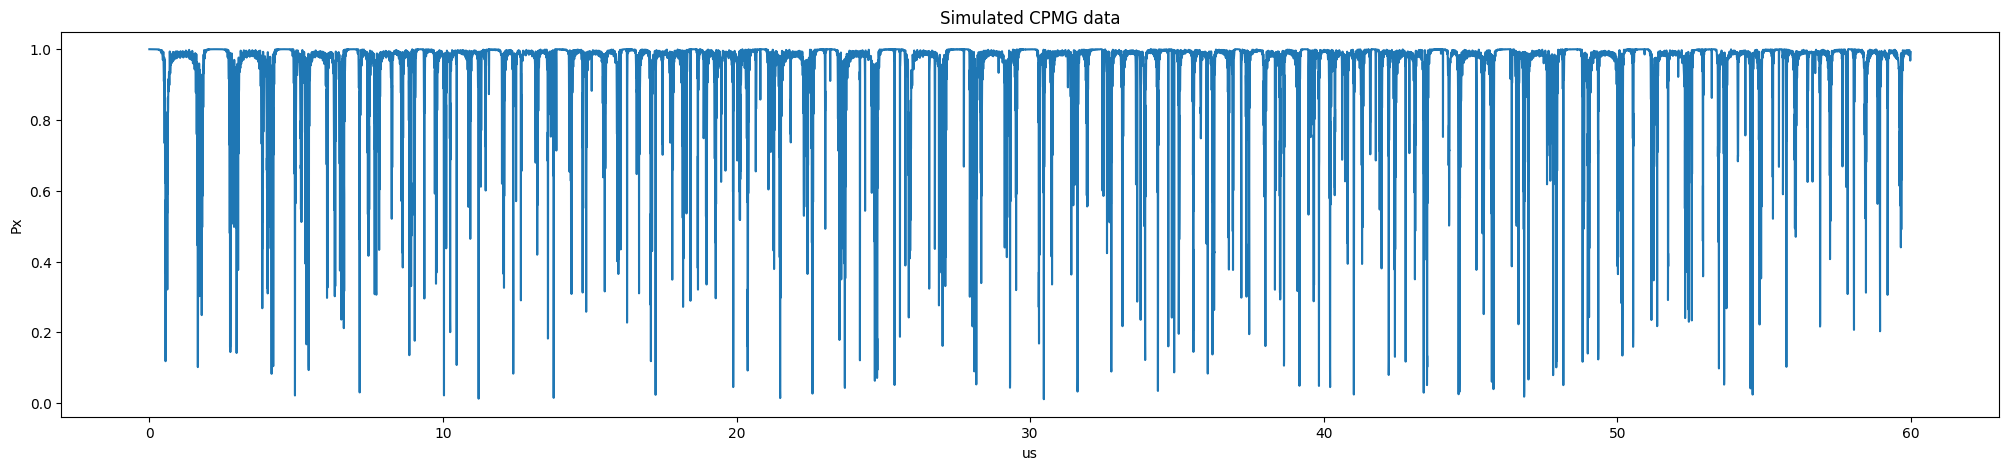

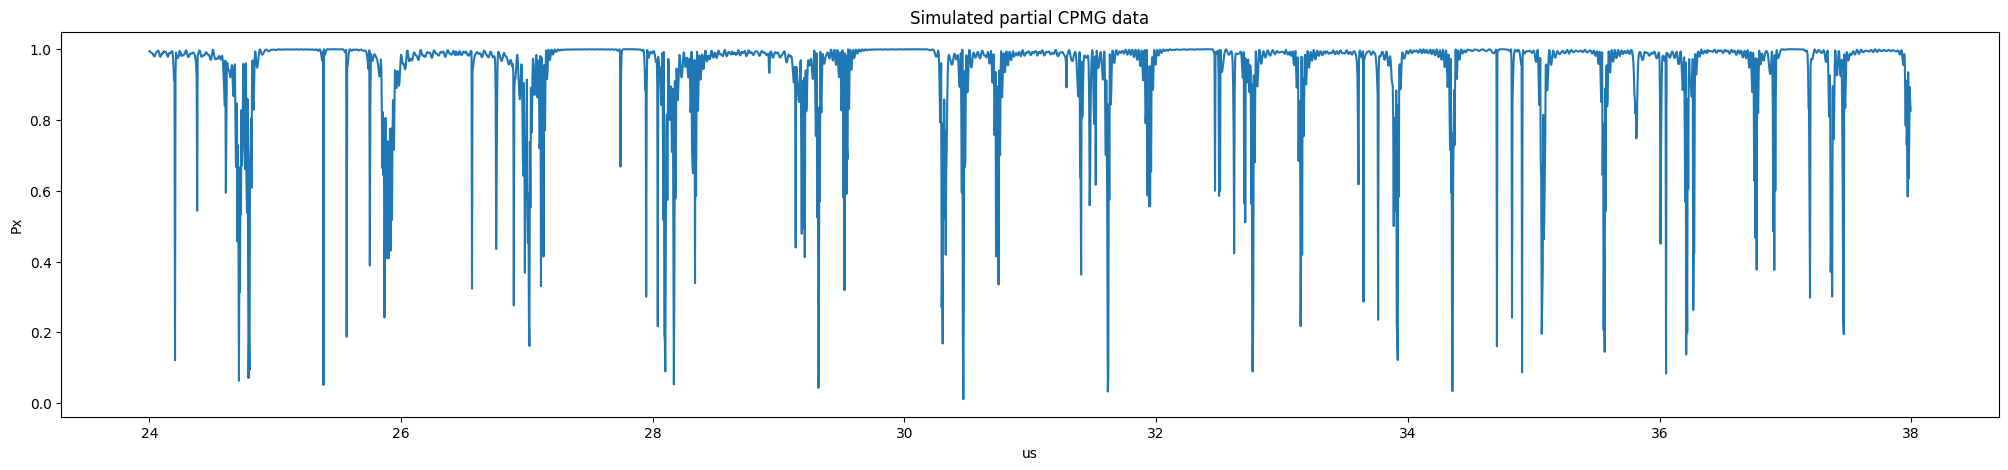

In [41]:
plt.figure(facecolor='w', figsize=(25, 5))
plt.plot(time_data, Px)
plt.title('Simulated CPMG data')
plt.xlabel('us')
plt.ylabel('Px')

plt.figure(facecolor='w', figsize=(25, 5))
plt.title('Simulated partial CPMG data')
plt.plot(time_data[6000:9500], Px[6000:9500])
plt.xlabel('us')
plt.ylabel('Px')

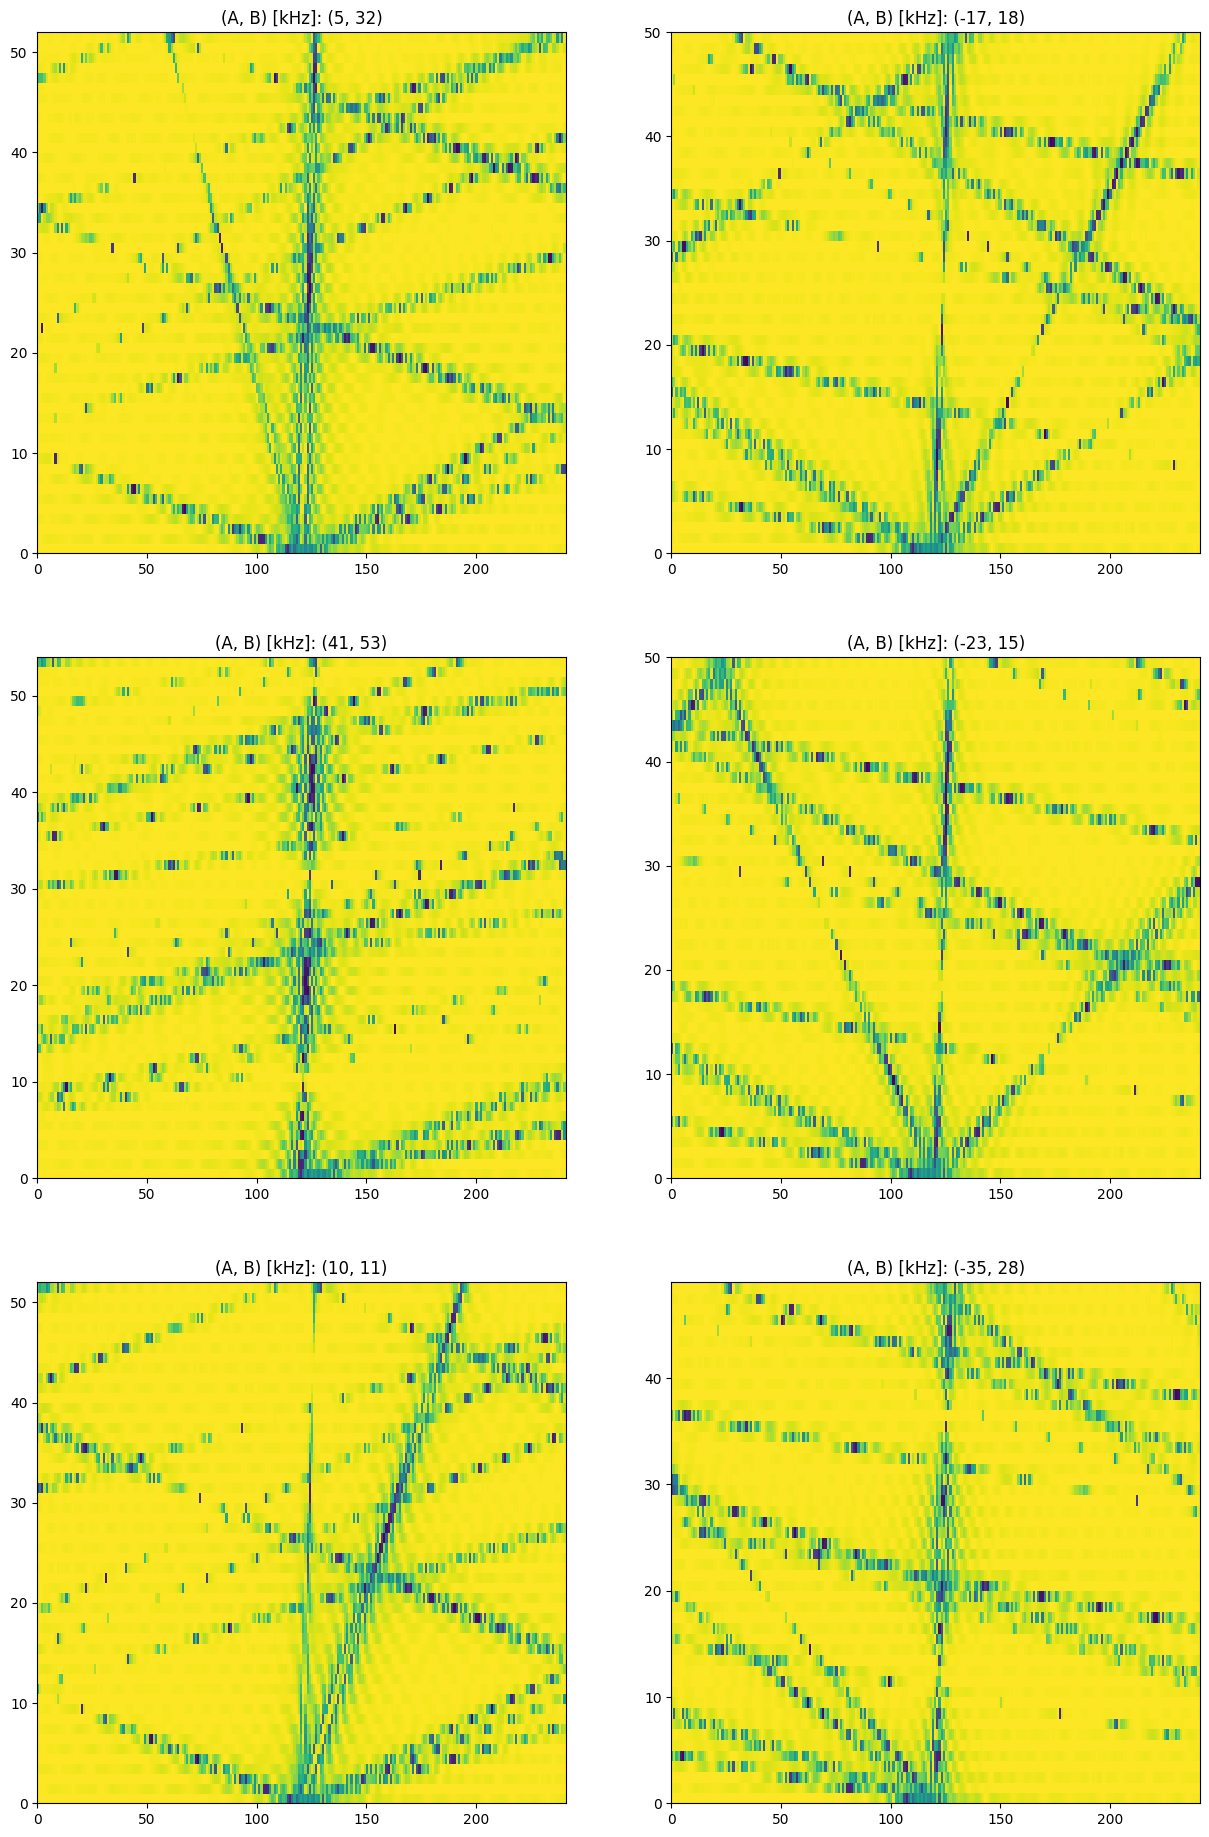

In [42]:
fig, axes = plt.subplots(facecolor='w', figsize=(15, 23), nrows=3, ncols=2)
for idx, spin in enumerate(total_spins):
  A_index = return_TPk_from_AB(spin[0]*1000, spin[1]*1000, WL_VALUE, 1)
  model_index = get_model_index(total_indices, A_index, time_thres_idx=time_data.shape[0], image_width=image_width)
  axes[idx%3, idx//3].pcolor(Px[model_index], vmin=0, vmax=1)
  axes[idx%3, idx//3].set_title('(A, B) [kHz]: '+'('+str(spin[0])+', ' + str(spin[1])+')')